In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dfob = pd.read_csv("observations.csv")

In [3]:
dfsp = pd.read_csv("species_info.csv")

In [4]:
print(dfob.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [5]:
dfob.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


array([[<AxesSubplot:title={'center':'observations'}>]], dtype=object)

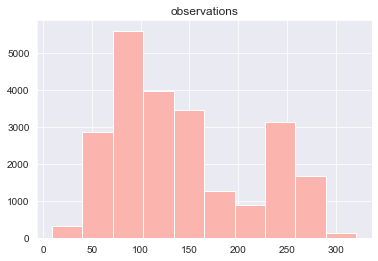

In [66]:
dfob.hist()

In [51]:
observations = dfob.groupby(['park_name','scientific_name']).observations.sum().reset_index()

In [53]:
print(observations.head(10))

             park_name       scientific_name  observations
0  Bryce National Park         Abies bifolia           109
1  Bryce National Park        Abies concolor            83
2  Bryce National Park         Abies fraseri           109
3  Bryce National Park  Abietinella abietina           101
4  Bryce National Park     Abronia ammophila            92
5  Bryce National Park  Abutilon theophrasti            84
6  Bryce National Park    Acalypha gracilens            68
7  Bryce National Park  Acalypha ostryifolia            95
8  Bryce National Park   Acalypha rhomboidea            90
9  Bryce National Park    Acalypha virginica           108


In [55]:
print(len(observations))

22164


In [57]:
observations2 = dfob.groupby('park_name').observations.sum().reset_index()

In [58]:
print(observations2)

                             park_name  observations
0                  Bryce National Park        576025
1  Great Smoky Mountains National Park        431820
2            Yellowstone National Park       1443562
3               Yosemite National Park        863332


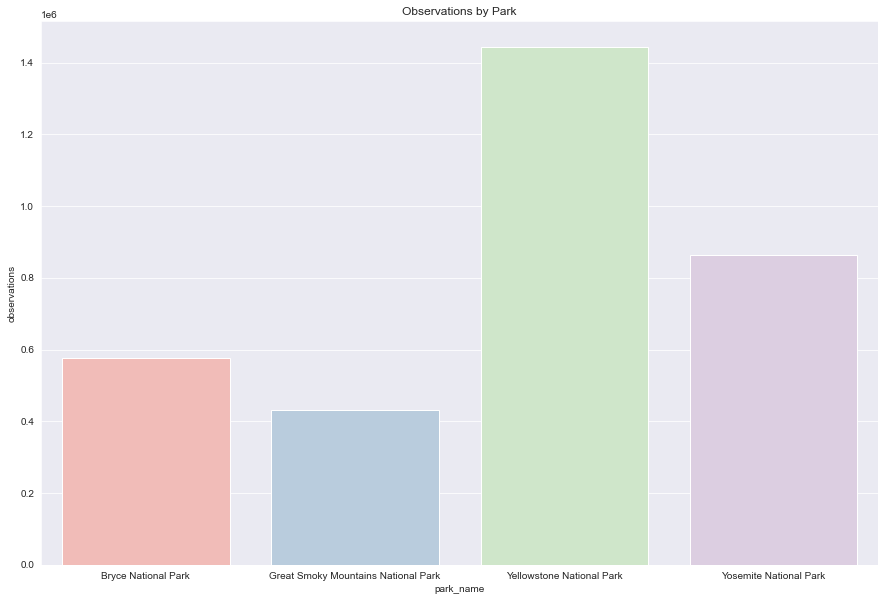

In [63]:
f, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Observations by Park")
sns.set_palette('Pastel1')
sns.barplot(data=observations2, x='park_name', y='observations')
sns.set_style('darkgrid')
plt.show()

In [7]:
print(dfsp.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [8]:
dfsp.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Puma concolor,Dicranum Moss,Species of Concern
freq,4470,3,7,161


In [9]:
for col in dfsp.columns:
    print(col)

category
scientific_name
common_names
conservation_status


In [25]:
endanger = dfsp.groupby('conservation_status').common_names.count().reset_index()

In [26]:
print(endanger)

  conservation_status  common_names
0          Endangered            16
1         In Recovery             4
2  Species of Concern           161
3          Threatened            10


In [27]:
endanger_by_cat = dfsp.groupby(['conservation_status', 'category']).common_names.count().reset_index()

In [13]:
print(endanger_by_cat)

   conservation_status           category  common_names
0           Endangered          Amphibian             1
1           Endangered               Bird             4
2           Endangered               Fish             3
3           Endangered             Mammal             7
4           Endangered     Vascular Plant             1
5          In Recovery               Bird             3
6          In Recovery             Mammal             1
7   Species of Concern          Amphibian             4
8   Species of Concern               Bird            72
9   Species of Concern               Fish             4
10  Species of Concern             Mammal            28
11  Species of Concern  Nonvascular Plant             5
12  Species of Concern            Reptile             5
13  Species of Concern     Vascular Plant            43
14          Threatened          Amphibian             2
15          Threatened               Fish             4
16          Threatened             Mammal       

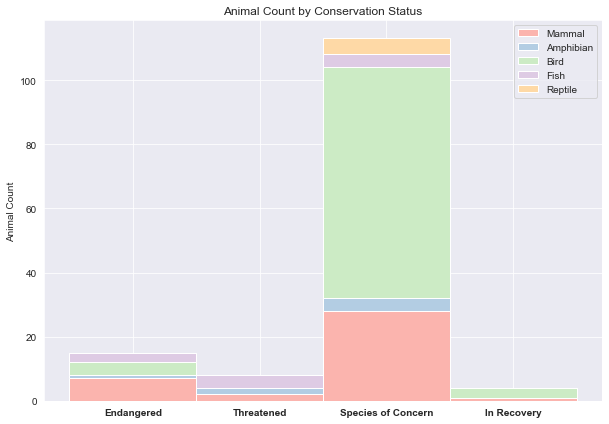

In [65]:
status = ["Endangered", "Threatened", "Species of Concern", "In Recovery"] 

Mammal = [7, 2, 28, 1]
Amphibian = [1, 2, 4, 0]
Bird = [4, 0, 72, 3]
Fish = [3, 4, 4, 0]
Reptile = [0, 0, 5, 0]

r = range(len(status))

barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
plt.bar(r, Mammal, width=barWidth, label="Mammal")
plt.bar(r, Amphibian, bottom=np.array(Mammal), width=barWidth, label='Amphibian')
plt.bar(r, Bird, bottom=np.array(Mammal)+np.array(Amphibian), width=barWidth, label='Bird')
plt.bar(r, Fish, bottom=np.array(Mammal)+np.array(Amphibian)+np.array(Bird), width=barWidth, label='Fish')
plt.bar(r, Reptile, bottom=np.array(Mammal)+np.array(Amphibian)+np.array(Bird)+ np.array(Fish), width=barWidth, label='Reptile')
plt.legend()

plt.xticks(r, status, fontweight='bold')
plt.ylabel("Animal Count")
plt.title("Animal Count by Conservation Status")
plt.show()
